### 1. Предварительный анализ данных

In [1]:
# Загружаем все необходимые библиотеки
from scipy import stats as st
from scipy.stats import shapiro , normaltest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import percentile
sns.set(color_codes=True)
#from termcolor import colored

In [2]:
#Загружаем таблицы и передаем информации в переменные
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод по предварительному анализу:
 - Name. Тип object , есть 2 пропуска. Возможно их можно удалить.
 - Platform. Тип object , пропусков нет. Нужно проверить тип платформ на уникальность и возможно привести к типовым значениям.
 - Year_of_Release. Тип float64, 1,6% пропусков. Возможно их можно удалить, т.к. заменить год можно приблизительно. Тип данных нужно привести к целым числам int64.
 - Genre. Тип object , есть 2 пропуска. Возможно их можно удалить. Также проверить значения на уникальность.
 - NA_sales. Тип float64. Пропусков нет.
 - EU_sales. Тип float64. Пропусков нет.
 - JP_sale. Тип float64. Пропусков нет.
 - Other_sales. Тип float64. Пропусков нет.
 - Critic_Score. Тип float64. Много пропусков. Возможно заменить тип данных на int64. Пропуски необходимо обработать и заменить значениями, возможно по доходу от игры.
 - User_Score. Тип object. Много пропусков. Возможно заменить тип данных на int64 после обработки пропусков. Возможно заменить пропуски по доходу от игры.
 - Rating. Тип object. Много пропусков. Пропуски необходимо проверить и возможно заменить по названию игр.

### 2. Подготовка данных

#### Замена названий столбцов

In [5]:
# Преобразование названий столбцов
data_games.columns = [columns.lower() for columns in data_games.columns]
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработка пропусков

#####  'name'

In [6]:
# Проверим столбцы на уникальность
data_games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [7]:
# Посмотрим на строки с пропусками в name
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# Удаляем строки с пропусками в name
data_games.dropna(subset=['name'] , inplace = True)
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Пропуски в столбце name удалены

#####  'platform'

In [9]:
# Посмотрим на уникальные значения platform
data_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#####  'year_of_release'

In [10]:
# Посмотрим на уникальные значения year_of_release
data_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
# Посмотрим на строки с пропусками в year_of_release
data_games[data_games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [12]:
# Удаляем строки с пропусками в year_of_release
data_games.dropna(subset=['year_of_release'] , inplace = True)
print('Пропуски удалены')
data_games['year_of_release'].isna().sum()

Пропуски удалены


0

#####  'genre'

In [13]:
# Посмотрим на строки с пропусками в genre
data_games[data_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#####  'critic_score'  ,   'user_score'  ,  'rating'

In [14]:
# Посмотрим на уникальные значения platform
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [15]:
# Посмотрим на уникальные значения user_score
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
# Посмотрим на уникальные значения rating
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# Значения К-А заменим на Е
data_games.loc[data_games['rating']=='K-A' , 'rating'] = 'E'
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
# Проверим значения tbd
data_games[data_games['user_score'] =='tbd'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [19]:
# Заменим значения tbd на NaN
data_games.loc[data_games['user_score']=='tbd' , 'user_score'] = np.NaN

# Проверим на уникальные значения user_score после замены
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [20]:
# Преобразуем данные user_score к численному типу
data_games['user_score'] = data_games['user_score'].astype(float)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [21]:
# Преобразуем данные year_of_release целому типу
data_games['year_of_release'] = data_games['year_of_release'].astype(int)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


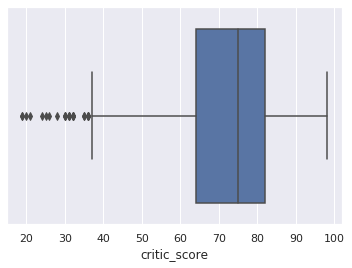

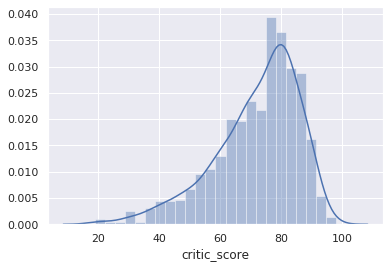

0        76.0
3        80.0
13       80.0
15       80.0
77       82.0
         ... 
16452    78.0
16474    57.0
16528    78.0
16546    78.0
16551    88.0
Name: critic_score, Length: 1165, dtype: float64

In [22]:
sports_genre = data_games.loc[(data_games['genre'] =='Sports') & (~data_games['critic_score'].isna()) , 'critic_score']
sports_genre
sns.boxplot(sports_genre)
plt.show()
sports_genre.mean()
sns.distplot(sports_genre)
plt.show()
sports_genre

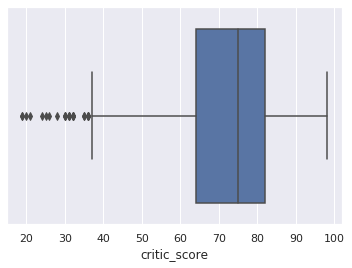

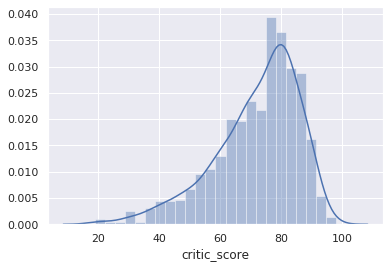

0        76.0
3        80.0
13       80.0
15       80.0
77       82.0
         ... 
16452    78.0
16474    57.0
16528    78.0
16546    78.0
16551    88.0
Name: critic_score, Length: 1165, dtype: float64

In [23]:
action_genre = data_games.loc[(data_games['genre'] =='Action') & (~data_games['critic_score'].isna()) , 'critic_score']
sports_genre
sns.boxplot(sports_genre)
plt.show()
sports_genre.mean()
sns.distplot(sports_genre)
plt.show()
sports_genre

In [24]:
data_games[data_games['genre'] == 'Sports'].corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,0.013299,0.054770,-0.228728,0.080712,-0.101135,-0.514169
na_sales,0.013299,1.000000,0.855775,0.462254,0.822296,0.140954,0.056217
eu_sales,0.054770,0.855775,1.000000,0.500727,0.871265,0.101488,0.016910
jp_sales,-0.228728,0.462254,0.500727,1.000000,0.460720,0.072932,0.084220
other_sales,0.080712,0.822296,0.871265,0.460720,1.000000,0.132162,0.031394
critic_score,-0.101135,0.140954,0.101488,0.072932,0.132162,1.000000,0.517810
user_score,-0.514169,0.056217,0.016910,0.084220,0.031394,0.517810,1.000000


#### Вывод по результатам подготовки данных:


#### Преобразование данных к нужным типам

In [25]:
#data_games[['year_of_release' , 'critic_score']] = data_games[['year_of_release' , 'critic_score']].astype(int)

#### Расчет суммарных продаж во всех регионах

In [26]:
# Складываем столбцы
data_games['sum_sales'] = (data_games['na_sales'] 
                         + data_games['eu_sales'] 
                         + data_games['jp_sales'] 
                         + data_games['other_sales'])
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


#### Вывод по результатам подготовки данных:

### 3. Исследовательский анализ данных

#### Сколько игр выпускалось за разные годы?

In [27]:
data_games_game_pivot = data_games.pivot_table(index = 'year_of_release' , values = 'name' ,  aggfunc = 'count')
data_games_game_pivot

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


#### Исследование платформ. 
Платформы с наибольшими суммарными продажами и их распределение по годам. 
    За какой характерный срок появляются новые и исчезают старые платформы?

In [28]:
data_games_platform_pivot = data_games.pivot_table(index = ['platform', 'year_of_release' ] 
                                                   , values = 'sum_sales' 
                                     
                                                   ,  aggfunc = 'sum')#.sort_values(by= 'sum_sales' , ascending = False)
data_games_platform_pivot

sum_sales
platform year_of_release           
2600     1980                 11.38
         1981                 35.68
         1982                 28.88
         1983                  5.84
         1984                  0.27
...                             ...
XB       2008                  0.18
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

[238 rows x 1 columns]

In [107]:
data_games_platform_pivot = (data_games.pivot_table(index = ['platform'] 
                                                   , values = 'sum_sales'                                      
                                                   ,  aggfunc = 'sum').
                                                    reset_index().
                                                    sort_values(by= 'sum_sales' , ascending = False).
                                                     head(8))
data_games_platform_pivot


,platform,sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88


In [108]:
data_games.query("platform == 'PS2'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [109]:
data_games_step = data_games.loc[data_games['platform']==value].sort_values(by = 'year_of_release')

In [140]:
ps2 = (data_games.loc[data_games['platform']=='PS2'].
                                 pivot_table(index = 'year_of_release' ,
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index())
x360 = (data_games.loc[data_games['platform']=='X360'].
                                 pivot_table(index = 'year_of_release' ,
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index())

ps3 = (data_games.loc[data_games['platform']=='PS3'].
                                 pivot_table(index = 'year_of_release' ,
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index())
wii = (data_games.loc[data_games['platform']=='Wii'].
                                 pivot_table(index = 'year_of_release' ,
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index())
ds = (data_games.loc[data_games['platform']=='DS'].
                                 pivot_table(index = 'year_of_release' ,
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index())

,year_of_release,sum_sales
0,2005,8.25
1,2006,51.62
2,2007,95.41
3,2008,135.26
4,2009,120.29
5,2010,170.03
6,2011,143.84
7,2012,99.74
8,2013,88.58
9,2014,34.74


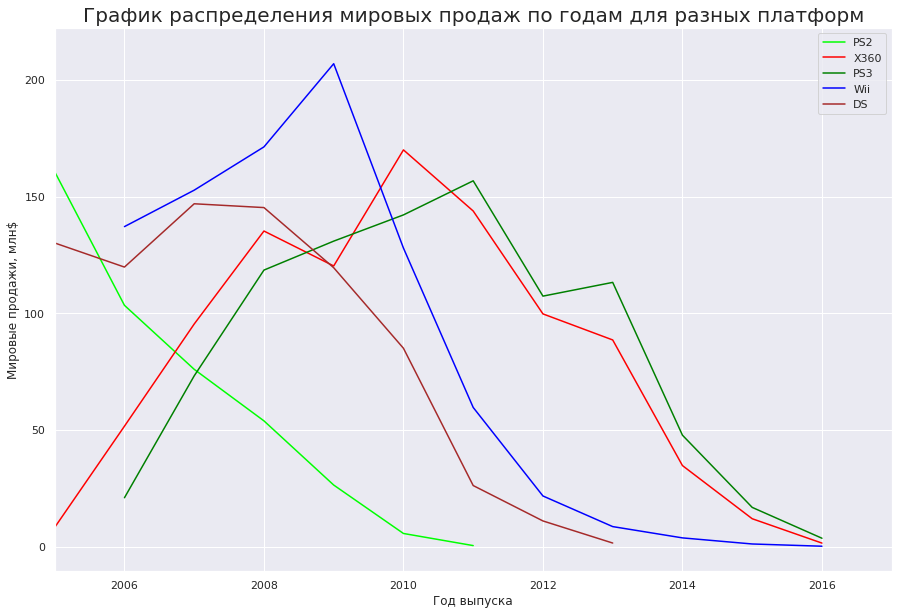

In [150]:
# График распределения продаж по годам для разных платформ
f,ax = plt.subplots(figsize =(15,10))
plt.grid()
plt.plot(ps2['year_of_release'], ps2['sum_sales'], color='lime' , label = 'PS2' )
plt.plot(x360['year_of_release'], x360['sum_sales'] , color='red', label = 'X360')
plt.plot(ps3['year_of_release'], ps3['sum_sales'] , color='green', label = 'PS3')
plt.plot(wii['year_of_release'], wii['sum_sales'] , color='blue', label = 'Wii')
plt.plot(ds['year_of_release'], ds['sum_sales'] , color='brown', label = 'DS')
plt.xlim([2005, 2017])

plt.title("График распределения мировых продаж по годам для разных платформ" , fontsize = 20)
ax.legend(loc='upper right',frameon = True)   
ax.set(xlabel='Год выпуска', ylabel='Мировые продажи, млн$')

plt.show()

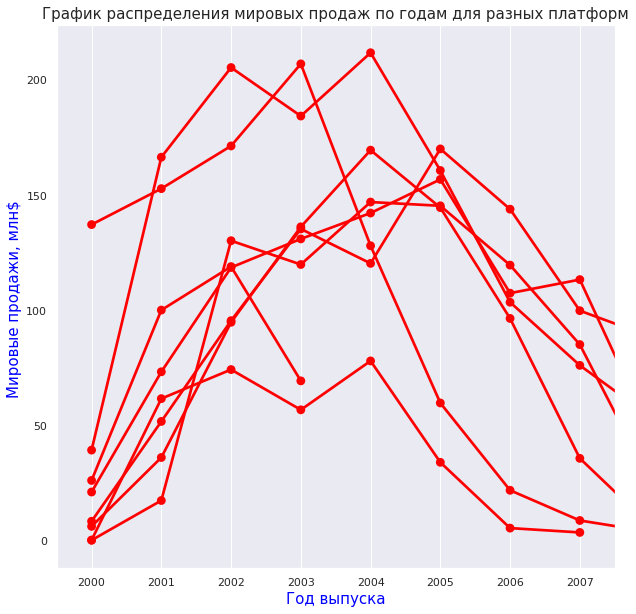

In [113]:
f,ax1 = plt.subplots(figsize =(10,10))
for value in data_games_platform_pivot.platform:   
    data_games_step = (data_games.loc[data_games['platform']==value].
                                 pivot_table(index = 'year_of_release' ,
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index()
                      )  
    
    sns.pointplot(x = 'year_of_release', y = 'sum_sales' , data = data_games_step , color = 'red' )
plt.title('График распределения мировых продаж по годам для разных платформ' , fontsize = 15)
plt.xlabel('Год выпуска',fontsize = 15,color='blue')
plt.ylabel('Мировые продажи, млн$ ',fontsize = 15,color='blue')
plt.grid()
plt.show()


#### Выбор актуальных данных

In [55]:
data_games_platform_pivot.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'GB'],
      dtype='object', name='platform')

In [133]:
plt.subplots?

In [104]:
sns.pointplot?

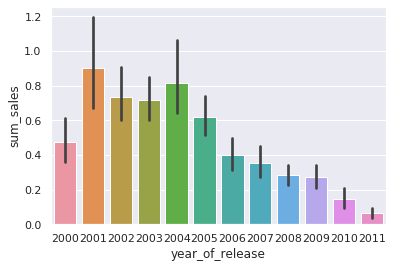

In [65]:
data_games_step = data_games.query("platform == 'PS2'")
sns.barplot(x = 'year_of_release', y = 'sum_sales' , data = data_games_step)
plt.show()

#### Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ.

#### Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Какая разница в продажах? А в средних продажах на разных платформах? Описание результата.

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами

#### Соотношение выводов с продажами игр на других платформах.

#### Анализ игр по жанрам. 

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### 4. Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). Описание различия в долях продаж

#### Самые популярные жанры (топ-5). Поясните разницу.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 5. Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Средние пользовательские рейтинги жанров Action и Sports разные

### 6. Общий вывод